In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from datetime import datetime

In [3]:
data = pd.read_csv("births.csv")

In [4]:
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


**Question no : 1**

In [5]:
data['decade'] = (data['year'] // 10) * 10


In [6]:
data.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


**Question no: 2**

In [7]:
data.describe()

,year,month,day,births,decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


**Question no: 3**

In [10]:
data.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
decade      0
dtype: int64

**Question no: 4**

In [8]:
births_per_decade_gender = data.groupby(['decade', 'gender'])['births'].sum().unstack()

births_per_decade_gender

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


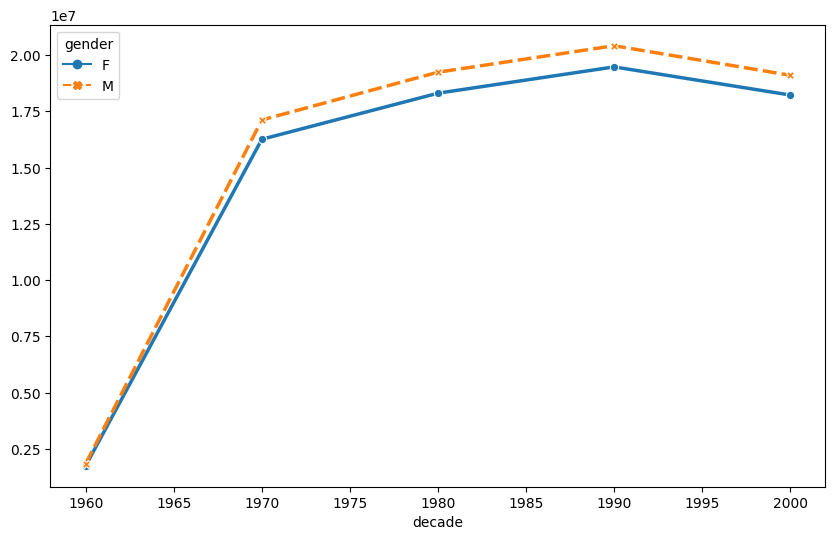

In [9]:
# Step 4: Plot the trend of male and female births every decade
plt.figure(figsize=(10, 6))

sb.lineplot(data=births_per_decade_gender, markers=True, linewidth=2.5)
plt.legend(title = 'gender')
plt.show()

**Question no: 5**

In [10]:
mean_births = data['births'].mean()
std_births = data['births'].std()

data = data[(data['births'] >= mean_births - 5 * std_births) & (data['births'] <= mean_births + 5 * std_births)]

**Question no: 6**

In [11]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')

c:\Users\areej\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1256: RuntimeWarning: invalid value encountered in cast
  masked_result = calc(carg[mask].astype(np.float64).astype(np.int64))


In [12]:
data['weekday'] = data['date'].dt.day_name()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
data_only_weekdays = data[data['weekday'].isin(weekdays)]

In [13]:
births_by_weekday = data_only_weekdays.groupby(['decade', 'weekday'])['births'].sum().unstack()
births_by_weekday

weekday,Friday,Monday,Thursday,Tuesday,Wednesday
decade,,,,,
1960,531220,526638,517742,549754,537910
1970,4992508,4895418,4903588,5090433,4949892
1980,5069502,4949739,5013476,5173612,5045584


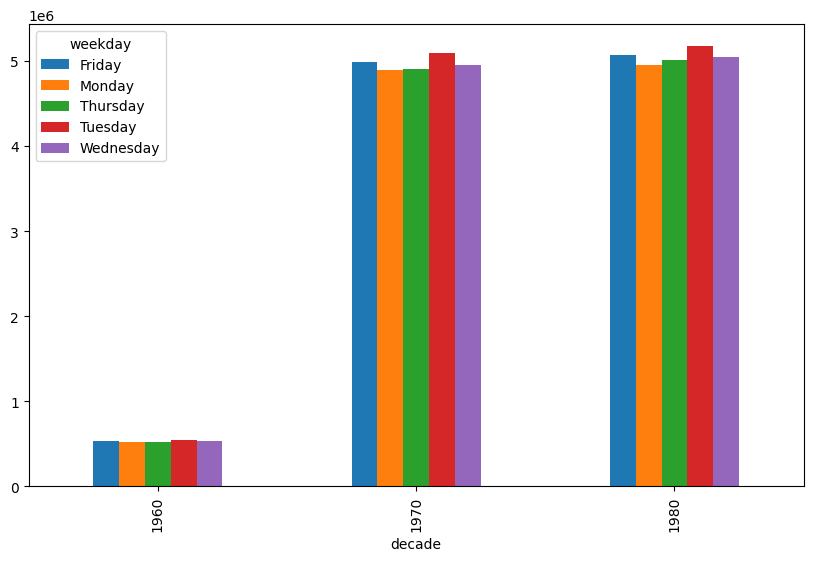

In [14]:

births_by_weekday.plot(kind='bar', figsize=(10, 6))
plt.show()

**Question no: 7**

In [15]:
data_by_month = data.groupby('month')['births'].sum().reset_index()
data_by_day = data.groupby('day')['births'].sum().reset_index()
data_by_month

,month,births
0,1,5759568
1,2,7582391
2,3,5868651
3,4,5712231
4,5,5785602
5,6,5759233
6,7,6220777
7,8,6310276
8,9,6206785
9,10,6056193


**Question no: 8**

In [16]:
data_plot = data[data['year'] == 1969]
data_plot['month_name'] = data_plot['date'].dt.month_name()
fig = px.line(data_plot, x= 'date', y='births')
fig.show()

C:\Users\areej\AppData\Local\Temp\ipykernel_5788\1828256825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plot['month_name'] = data_plot['date'].dt.month_name()
